In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x28e7cbe7460>)

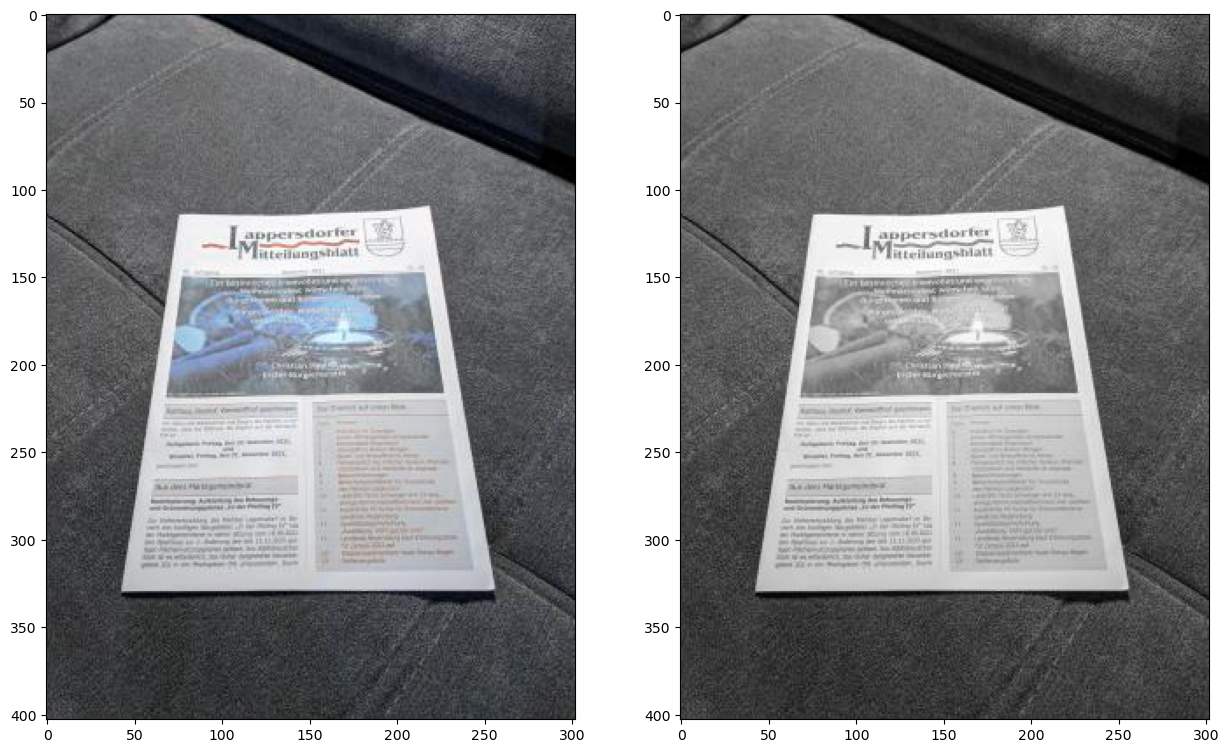

In [2]:
img = cv2.imread('desktop/document.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In [3]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x28e7cc94760>)

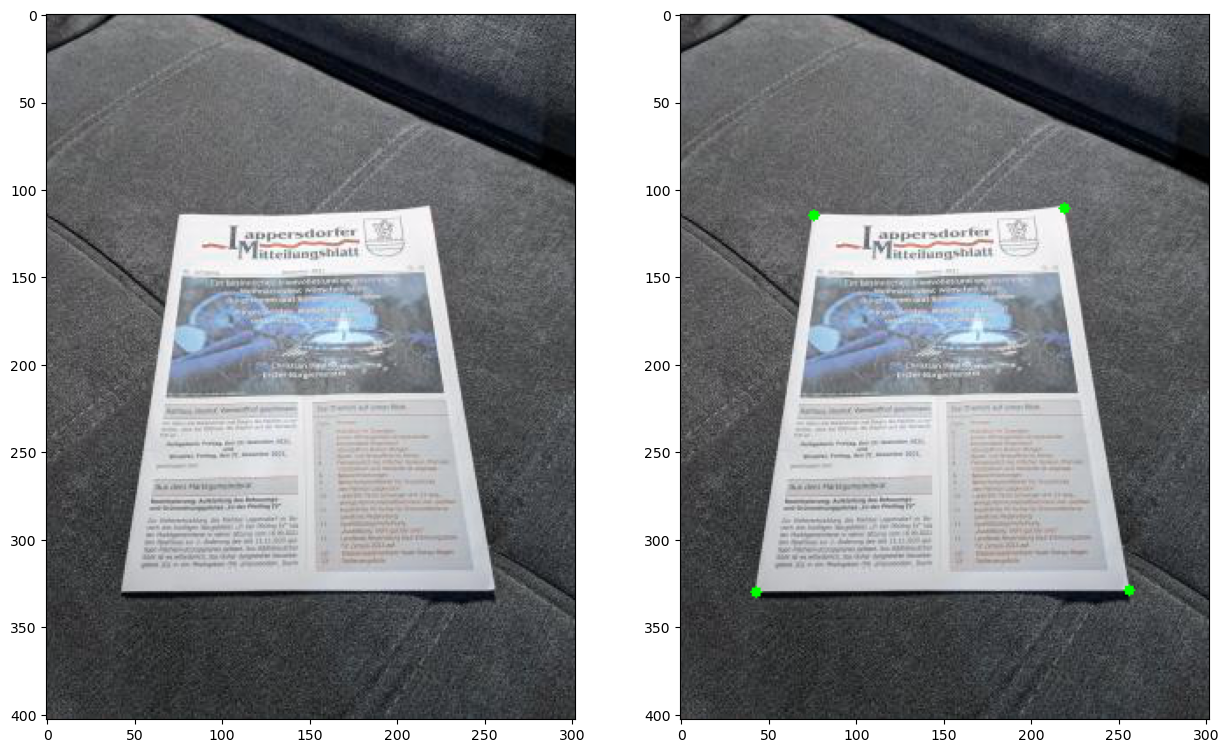

In [4]:
# Let's plot the points
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (0,255,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (0,255,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (0,255,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (0,255,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

In [5]:
# Define the matrix of source points corresponding to the 4 document corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

#src.shape
# Define the matrix of target (destination) points corresponding to the 4 image corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
# Note2: The order of points in src and dst must be the same
dst = np.array([[0, 0], [gray.shape[0]-1, 0], [0, gray.shape[1]-1], [gray.shape[0]-1, gray.shape[1]-1]], dtype=np.float32)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x28e7cd97c40>)

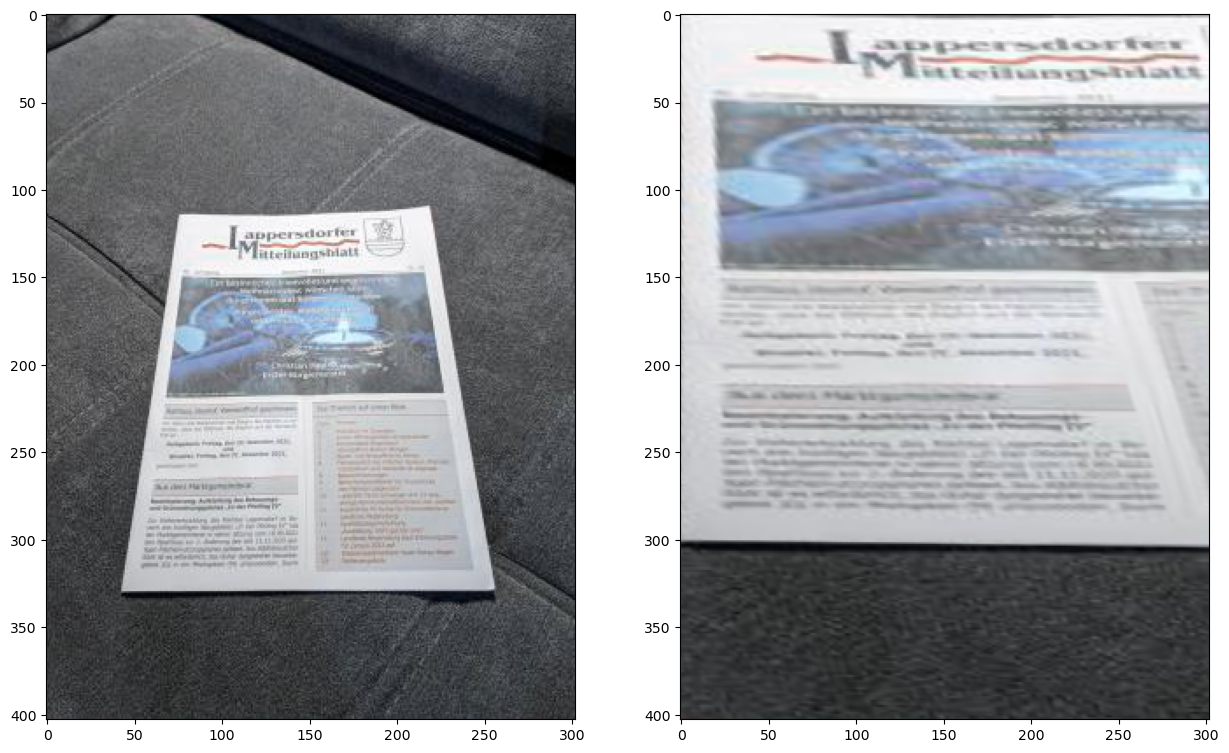

In [6]:
# Compute the affine transform matrix (you'll have to use getAffineTransform function from OpenCV here)
# Use the first 3 points from your src and dst matrix
#M = cv2.getAffineTransform([top_left, top_right, bottom_left], [[0, 0], [gray.shape[0]-1, 0], [0, gray.shape[1]-1]])

M = cv2.getAffineTransform(src[0:3], dst[0:3])

# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
rectified = cv2.warpAffine(img, M, (cols,rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x28e7e0fd9d0>)

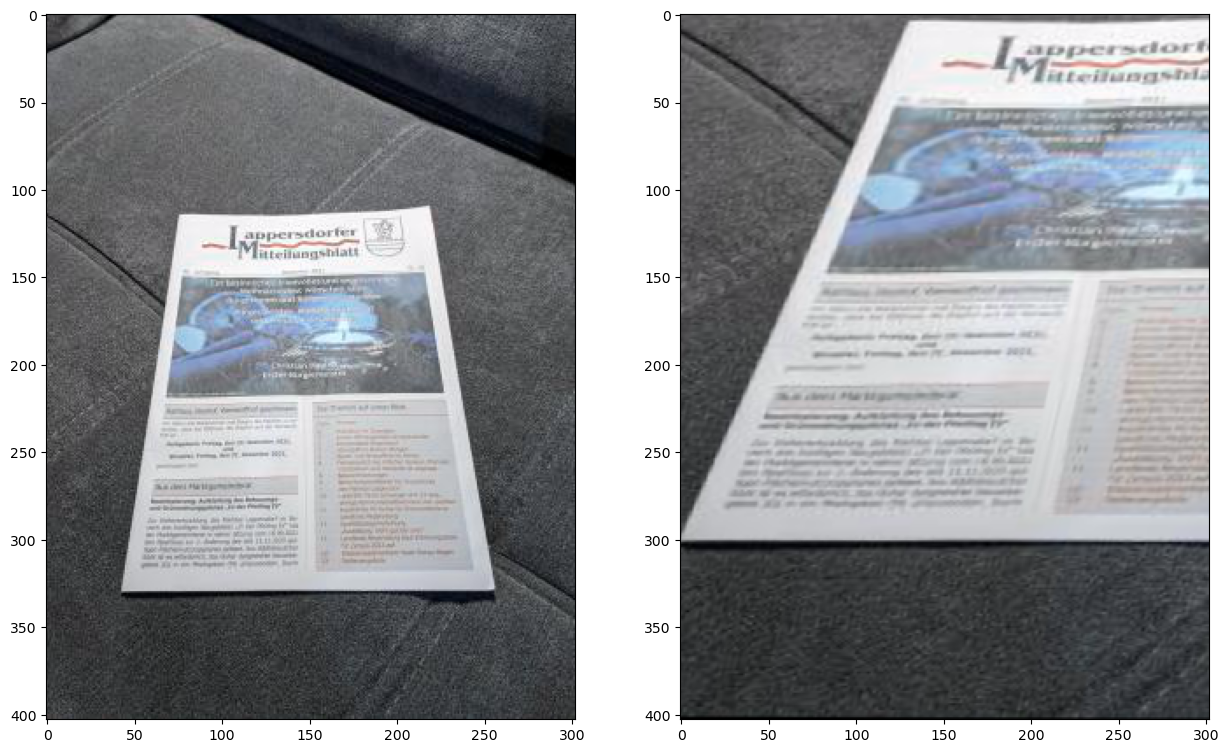

In [7]:
# Compute the affine transform matrix (use getAffineTransform)
# Use the last 3 points from your src and dst matrix
M = cv2.getAffineTransform(src[-3:], dst[-3:])

# Build the rectified image using the computed matrix (use warpAffine)
rectified = cv2.warpAffine(img, M, (cols,rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x28e014a38b0>)

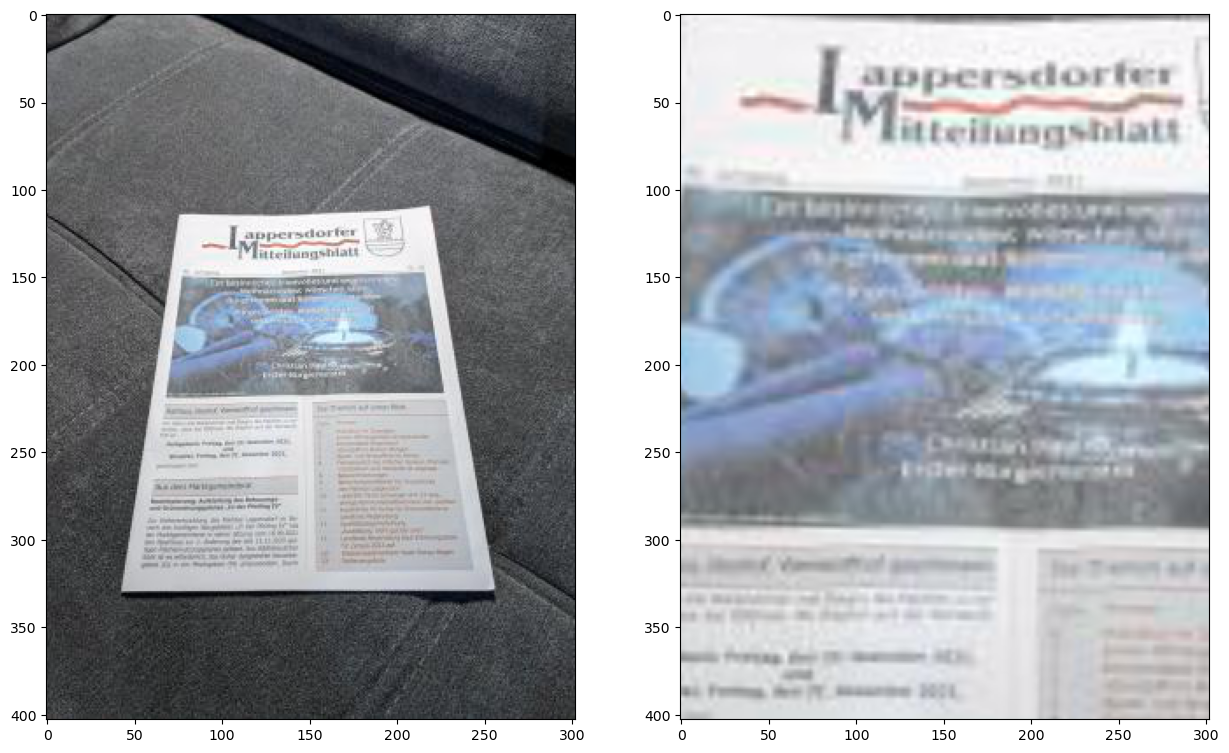

In [16]:
# Estimate the optimal affine transform matrix (you'll have to use estimateAffine2D function from OpenCV here)
# estimateAffine2D it returns the best fitting affine matrix as well as the vector of inliers (1 -> inlier,
# 0 -> outlier).
M, inliers = cv2.estimateAffinePartial2D(src, dst)

# Build the rectified image using the computed matrix (use warpAffine)
rectified = cv2.warpAffine(img, M, (cols,rows))

#print(inliers)
# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

#### There is not much of an improvement either. Let's try homography instead of affine transform. Remember that for computing the homography analytically we need to use 4 pairs of points.

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x28e00611280>)

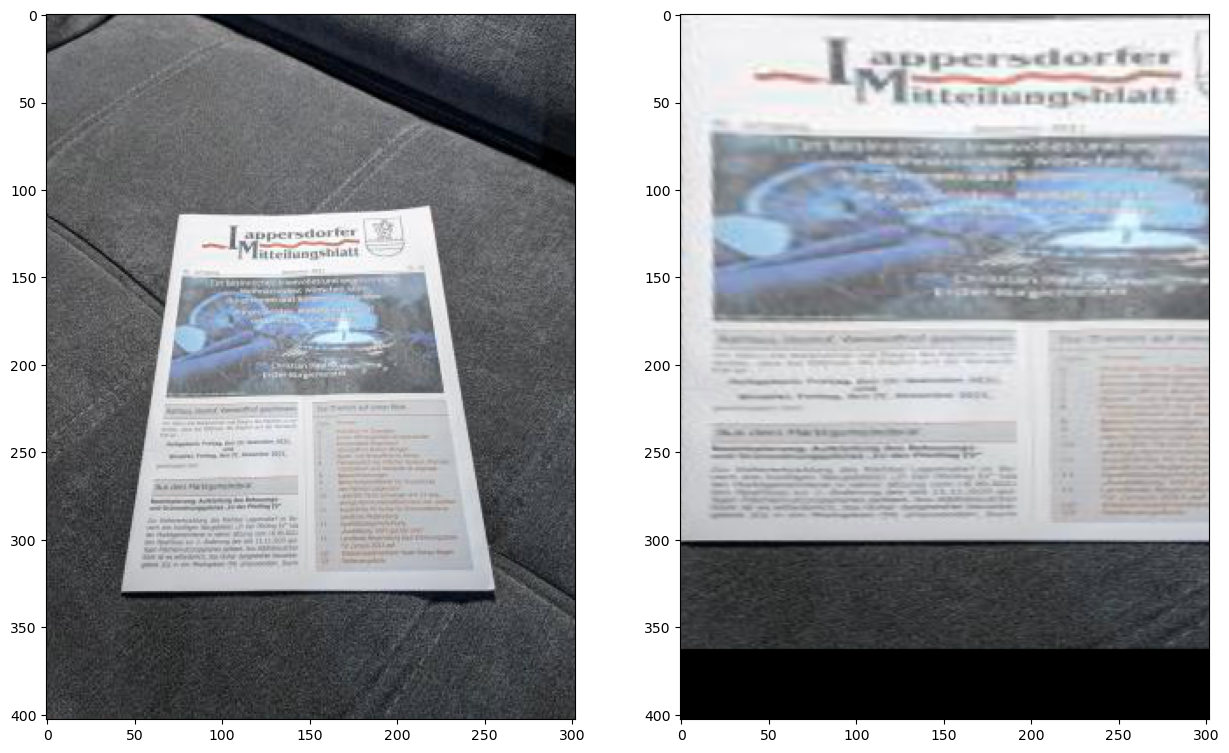

In [12]:
# Compute the homography matrix (you'll have to use getPerspectiveTransform function from OpenCV here)
M = cv2.getPerspectiveTransform(src, dst)

# Build the rectified image using the computed matrix (you'll have to use warpPerspective function from OpenCV)
#rectified = cv2.warpPerspective(img, M, (cols,rows), flags=cv2.INTER_LINEAR)
rectified = cv2.warpPerspective(img, M, (cols,rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

# Questions
### 1) The affine transform does not seem to be working well in this case. Why?

I think that due to the fact that there is a perspective distortion on the original image of the document, that is, the bottom of the page lies closer to us than the top of the document in real life

### 2) What can you tell me about the values you have obtained for the inliers vector? What does it mean?

print(inliers) giving the next result = [[1] [1] [0] [0]] and knowing that according to the documentation cv2EstimateAffine2D Method "inliers" this is output vector indicating which points are inliers (1 - inlier, 0 -outlier), so we can do the conclusion that our first two points are inliers, and the last two - outliers 

### 3) How does the result from homography look? Does it work well enough?

The result of homography looks better than all the previous ones, if only because this method placed the entire document on the image after transformation, but for me personally the photo did not stretch to the full size and the bottom of the image has a background and a part of unnecessary black fill
But at all, i think homography work pretty well :)

